In [1]:
import pandas as pd


In [149]:
df = pd.read_csv('train.csv')



In [151]:
df.head()


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,1,1710,1,0,2,1,3,208500
1,2,1262,0,1,2,0,3,181500
2,3,1786,1,0,2,1,3,223500
3,4,1717,1,0,1,0,3,140000
4,5,2198,1,0,2,1,4,250000



# Data preprocessing

In [15]:
df.isnull().sum()


Id              0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [74]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   BsmtFullBath  1460 non-null   int64
 3   BsmtHalfBath  1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   HalfBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   SalePrice     1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [72]:
df.describe()


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,421.610009,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,730.500000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,1095.250000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,1460.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset with SalePrice

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
y_log = np.log1p(y) 
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")





Mean Squared Error: 2606422923.95


In [173]:
y_test[:]

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [137]:
y_pred[:5]

array([108252.57610035, 316479.31296637, 120095.22246655, 191900.20693909,
       238417.82685672])

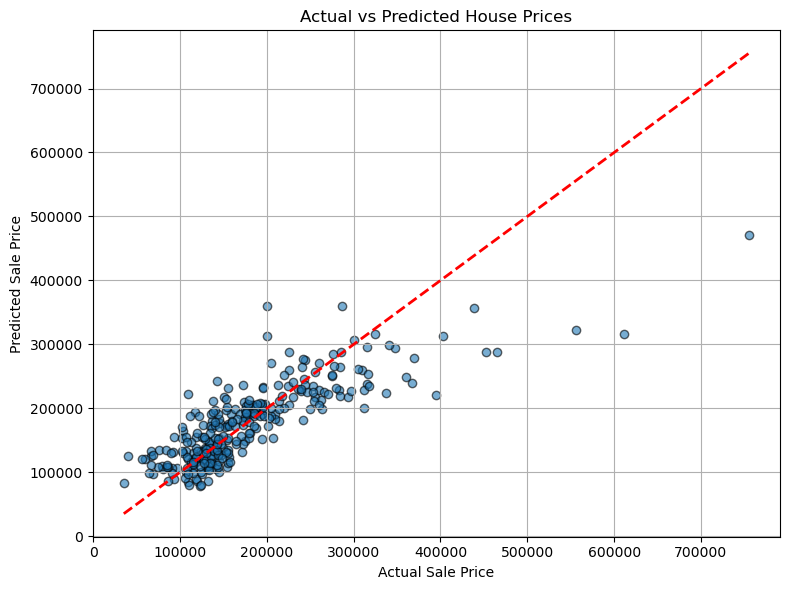

In [209]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal line
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


In [213]:
test_df = pd.read_csv('test.csv')

test_df.isnull().sum()


Id              0
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [215]:
test_df[test_df.isnull().any(axis=1)]


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr
660,2121,896,NaN,NaN,1,0,2
728,2189,3820,NaN,NaN,3,1,5


In [217]:
test_df = test_df.dropna()

In [219]:
test_df.isnull().sum()

Id              0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
dtype: int64

In [221]:



predicted_prices = model.predict(test_df)

test_df['PredictedPrice'] = predicted_prices
test_df


,Id,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,PredictedPrice
0,1461,896,0.0,0.0,1,0,2,103865.697058
1,1462,1329,0.0,0.0,1,1,3,128347.620840
2,1463,1629,0.0,0.0,2,1,3,191992.490555
3,1464,1604,0.0,0.0,2,1,3,189624.122214
4,1465,1280,0.0,0.0,2,0,2,175445.545008
...,...,...,...,...,...,...,...,...
1454,2915,1092,0.0,0.0,1,1,3,100734.362369
1455,2916,1092,0.0,0.0,1,1,3,100730.786993
1456,2917,1224,1.0,0.0,1,0,4,112493.745919
1457,2918,970,0.0,1.0,1,0,3,91742.451508
